In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import modelFusion as MF
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# Support vector radial basis classifier
A = pd.read_csv('Crank data/Crank 44/w9zj18ewvMD2D.csv')
# Random forest classification
B = pd.read_csv('Crank data/Crank 44/w3qaqvdepL2JZ.csv')
# Weighted logistic classifier
C = pd.read_csv('Crank data/Crank 44/wZWGwwoZOBZwZ.csv')
# Gradient boosted tree
D = pd.read_csv('Crank data/Crank 44/w3M6mXamm38Or.csv')

In [3]:
Raw_A = MF.preclean(A)
Raw_B = MF.preclean(B)
Raw_C = MF.preclean(C)
Raw_D = MF.preclean(D)



In [4]:
RA, A_prec = MF.rank_raw(Raw_A)
RB, B_prec = MF.rank_raw(Raw_B)
RC, C_prec = MF.rank_raw(Raw_C)
RD, D_prec = MF.rank_raw(Raw_D)

In [5]:
raw = MF.raw_def([Raw_A,Raw_B,Raw_C,Raw_D])

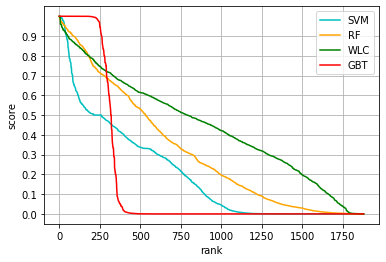

In [6]:
RSCG = MF.RSC_graph(raw)

In [7]:
SCAB = MF.two_fusionW(Raw_A,Raw_B)
SCAC = MF.two_fusionW(Raw_A,Raw_C)
SCAD = MF.two_fusionW(Raw_A,Raw_D)
SCBC = MF.two_fusionW(Raw_B,Raw_C)
SCBD = MF.two_fusionW(Raw_B,Raw_D)
SCCD = MF.two_fusionW(Raw_C,Raw_D)
SCABC = MF.three_fusionW(Raw_A,Raw_B,Raw_C)
SCABD = MF.three_fusionW(Raw_A,Raw_B,Raw_D)
SCACD = MF.three_fusionW(Raw_A,Raw_C,Raw_D)
SCBCD = MF.three_fusionW(Raw_B,Raw_C,Raw_D)
SCABCD = MF.four_fusionW(Raw_A,Raw_B,Raw_C,Raw_D)

/home/jupyter/tacc-work/Yuanqing/modelFusion.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  CMB['score'] = (first.iloc[:,[-1]]*weight[0] + second.iloc[:,[-1]]*weight[1] )/(weight[0]+weight[1])
/home/jupyter/tacc-work/Yuanqing/modelFusion.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  CMB['score'] = (first.iloc[:,[-1]]*weight[0] + second.iloc[:,[-1]]*weight[1]+third.iloc[:,[-1]]*weight[2] )/(weight[0]+weight[1]+weight[2])
/home/jupyter/tacc-work/Yuanqing/modelFusion.py:206: SettingWithCopyWarning: 
A value is trying to be set o

In [8]:
RCAB = MF.two_fusionW(RA,RB,[1,1],False)
RCAC = MF.two_fusionW(RA,RC,[1,1],False)
RCAD = MF.two_fusionW(RA,RD,[1,1],False)
RCBC = MF.two_fusionW(RB,RC,[1,1],False)
RCBD = MF.two_fusionW(RB,RD,[1,1],False)
RCCD = MF.two_fusionW(RC,RD,[1,1],False)
RCABC = MF.three_fusionW(RA,RB,RC,[1,1,1],False)
RCABD = MF.three_fusionW(RA,RB,RD,[1,1,1],False)
RCACD = MF.three_fusionW(RA,RC,RD,[1,1,1],False)
RCBCD = MF.three_fusionW(RB,RC,RD,[1,1,1],False)
RCABCD = MF.four_fusionW(RA,RB,RC,RD,[1,1,1,1],False)

In [9]:
#find the rank of each data point in each single ML model
rawRank = pd.DataFrame([RA['ID'],RA['truth'],RA['rank'],RB['rank'],RC['rank'],RD['rank']])
rawRank = rawRank.T

In [10]:
# combined all the fusion model into one for later
List = [SCAB,SCAC,SCAD,SCBC,SCBD,SCCD,SCABC,SCABD,SCACD,SCBCD,SCABCD]
ListName = ['AB','AC','AD','BC','BD','CD','ABC','ABD','ACD','BCD','ABCD']

In [11]:
for i in range(11):
    print(ListName[i])
    print(MF.find_df(List[i],rawRank,sum(RA['truth'])))

AB
        ID   rank     score  truth
282  283.0  354.0  0.523875    1.0
None
AC
Empty DataFrame
Columns: []
Index: []
None
AD
Empty DataFrame
Columns: []
Index: []
None
BC
Empty DataFrame
Columns: []
Index: []
None
BD
Empty DataFrame
Columns: []
Index: []
None
CD
Empty DataFrame
Columns: []
Index: []
None
ABC
Empty DataFrame
Columns: []
Index: []
None
ABD
Empty DataFrame
Columns: []
Index: []
None
ACD
Empty DataFrame
Columns: []
Index: []
None
BCD
Empty DataFrame
Columns: []
Index: []
None
ABCD
Empty DataFrame
Columns: []
Index: []
None


In [12]:
for i in range(11):
    print(ListName[i])
    print(MF.find_dfop(List[i],rawRank,sum(RA['truth'])))

AB
Empty DataFrame
Columns: []
Index: []
None
AC
Empty DataFrame
Columns: []
Index: []
None
AD
Empty DataFrame
Columns: []
Index: []
None
BC
Empty DataFrame
Columns: []
Index: []
None
BD
Empty DataFrame
Columns: []
Index: []
None
CD
Empty DataFrame
Columns: []
Index: []
None
ABC
Empty DataFrame
Columns: []
Index: []
None
ABD
Empty DataFrame
Columns: []
Index: []
None
ACD
Empty DataFrame
Columns: []
Index: []
None
BCD
Empty DataFrame
Columns: []
Index: []
None
ABCD
Empty DataFrame
Columns: []
Index: []
None


In [13]:
TPlist = []
for i in range(len(List)):
    x = MF.find_TP(List[i], sum(List[i]['truth']))
    MF.addtolist(x,TPlist)
    
precision =[]

for i in List:
    x = MF.rank_function(i)
    MF.addtolist(x,precision)

    

In [14]:
dict = { 'True positive': TPlist,'SC': precision}
df = pd.DataFrame(dict, index=['AB','AC','AD','BC','BD','CD',
                               'ABC','ABD','ACD','BCD','ABCD'])
df

,SC,True positive
AB,0.719888,257
AC,0.616246,220
AD,0.697479,249
BC,0.644258,230
BD,0.705882,252
CD,0.689076,246
ABC,0.703081,251
ABD,0.711485,254
ACD,0.708683,253
BCD,0.708683,253


In [15]:
ListRank = [RCAB,RCAC,RCAD,RCBC,RCBD,RCCD,RCABC,RCABD,RCACD,RCBCD,RCABCD]
ListRankName = ['AB','AC','AD','BC','BD','CD','ABC','RCABD','RCACD','RCBCD','RCABCD']


In [17]:
TPlistr = []
for i in range(len(ListRank)):
    x = MF.find_TP(ListRank[i], sum(ListRank[i]['truth']))
    MF.addtolist(x,TPlistr)
    
precisionr =[]

for i in ListRank:
    x = MF.rank_function(i)
    MF.addtolist(x,precisionr)

In [18]:
dict = { 'True positive': TPlistr,'RC': precisionr}
rc = pd.DataFrame(dict, index=ListName)
rc

,RC,True positive
AB,0.725490,259
AC,0.616246,220
AD,0.714286,255
BC,0.591036,211
BD,0.725490,259
CD,0.638655,228
ABC,0.672269,240
ABD,0.733894,262
ACD,0.708683,253
BCD,0.691877,247


In [19]:
result=pd.DataFrame()
for i in range(11):
    print(ListRankName[i])
    print(MF.find_df(ListRank[i],rawRank,sum(RA['truth'])))

AB
        ID   rank  score  truth
282  283.0  350.0  377.0    1.0
None
AC
        ID   rank  score  truth
691  692.0  350.0  431.0    1.0
None
AD
Empty DataFrame
Columns: []
Index: []
None
BC
Empty DataFrame
Columns: []
Index: []
None
BD
          ID   rank  score  truth
926    927.0  357.0  376.5    1.0
1253  1254.0  348.0  364.5    1.0
None
CD
        ID   rank  score  truth
483  484.0  339.0  421.5    1.0
None
ABC
Empty DataFrame
Columns: []
Index: []
None
RCABD
Empty DataFrame
Columns: []
Index: []
None
RCACD
Empty DataFrame
Columns: []
Index: []
None
RCBCD
Empty DataFrame
Columns: []
Index: []
None
RCABCD
Empty DataFrame
Columns: []
Index: []
None


In [20]:
resultss=pd.DataFrame()
for i in range(11):
    print(ListRankName[i])
    print(MF.find_dfop(ListRank[i],rawRank,sum(RA['truth'])))

AB
Empty DataFrame
Columns: []
Index: []
None
AC
Empty DataFrame
Columns: []
Index: []
None
AD
Empty DataFrame
Columns: []
Index: []
None
BC
Empty DataFrame
Columns: []
Index: []
None
BD
Empty DataFrame
Columns: []
Index: []
None
CD
Empty DataFrame
Columns: []
Index: []
None
ABC
Empty DataFrame
Columns: []
Index: []
None
RCABD
Empty DataFrame
Columns: []
Index: []
None
RCACD
Empty DataFrame
Columns: []
Index: []
None
RCBCD
Empty DataFrame
Columns: []
Index: []
None
RCABCD
Empty DataFrame
Columns: []
Index: []
None


In [21]:
newDF = pd.concat([df.SC,rc.RC], axis = 1)
newDF.insert(0,'model',['AB','AC','AD','BC','BD','CD','ABC','ABD','ACD','BCD','ABCD'])

d = {'model':['A','B','C','D'], 'SC': [A_prec,B_prec,C_prec,D_prec],'RC': [A_prec,B_prec,C_prec,D_prec] }
singleDF = pd.DataFrame(d, index = ['A','B','C','D'])
doubleDF = pd.DataFrame(newDF[:6])
tripeDF = pd.DataFrame(newDF[6:10])
quarticDF = pd.DataFrame(newDF[10:11])

singleDF = singleDF.sort_values(by = 'RC')
doubleDF = doubleDF.sort_values(by = 'RC')
tripeDF = tripeDF.sort_values(by = 'RC')
quarticDF = quarticDF.sort_values(by = 'RC')

newDF

,model,SC,RC
AB,AB,0.719888,0.725490
AC,AC,0.616246,0.616246
AD,AD,0.697479,0.714286
BC,BC,0.644258,0.591036
BD,BD,0.705882,0.725490
CD,CD,0.689076,0.638655
ABC,ABC,0.703081,0.672269
ABD,ABD,0.711485,0.733894
ACD,ACD,0.708683,0.708683
BCD,BCD,0.708683,0.691877


(0.5, 0.75)

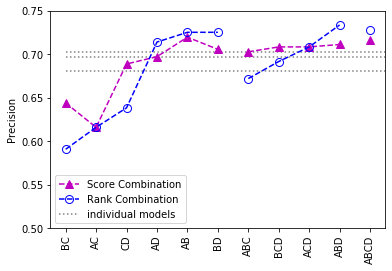

In [22]:
l1 = plt.hlines(A_prec,0,10.5,'gray', linestyle= 'dotted')
l2 = plt.hlines(B_prec,0,10.5,'gray', linestyle= 'dotted')
l3 = plt.hlines(C_prec,0,10.5,'gray', linestyle= 'dotted')
l4 = plt.hlines(D_prec,0,10.5,'gray', linestyle= 'dotted',label = 'individual models')

plt.plot(doubleDF.model, doubleDF.SC, '^--', c = 'm',markersize = 8)
plt.plot(doubleDF.model, doubleDF.RC, 'o--', c = 'b', fillstyle = 'none',markersize = 8 )

plt.plot(tripeDF.model, tripeDF.SC, '^--',c = 'm',markersize = 8 )
plt.plot(tripeDF.model, tripeDF.RC, 'o--', c = 'b',fillstyle = 'none',markersize = 8 )

plt.plot(quarticDF.model, quarticDF.SC, '^--',c = 'm',markersize = 8 , label = 'Score Combination')
plt.plot(quarticDF.model, quarticDF.RC, 'o--', c = 'b', markersize = 8 ,label = 'Rank Combination',fillstyle = 'none')

plt.ylabel("Precision")


plt.xticks(rotation=90)
plt.legend(loc = 'best')
plt.ylim(0.5,0.75)

